#### Exercicis: 
- Exercici 1: Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.
- Exercici 2: Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.
- Exercici 3: Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.
- Exercici 4: Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.
- Exercici 5: Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

#### Neteja i interpretació de les dades.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted wines', 'proline']
wines = pd.read_csv('/Users/juliacorominasfont/Desktop/DATA ANALYST/Bootcamp IT Academy/Tasques Sprints/Sprint_7_ML_classification/wineData.txt', names=cols)
wines.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
wines.shape

(178, 14)

In [56]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted wines  178 non-null    float64
 13  proli

El dataset té 178 registres i 14 columnes, incloent la variable objectiu. Els 13 atributs contenen una variable continua i són:

- alcohol: Contingut d'alcohol en el vi, generalment mesurat en percentatge d'alcohol volumètric.
- malic_acid: àcid màlic present al vi, una substància que pot afectar el sabor i la textura del vi.
- ash: quantitat de cendra present en el vi després de la fermentació. A vegades es considera com una mesura de minerals.
- alcalinity_of_ash: nivell de basicitat de la cendra present en el vi. Pot donar una indicació de la qualitat de la matèria prima.
- magnesium: contingut de magnesi en el vi, que pot influir en diversos aspectes com el color i la fermentació.
- total_phenols: quantitat total de fenols, compostos que poden influir en el color, sabor i aroma del vi.
- flavanoids: quantitat d'un tipus específic de fenols que poden contribuir als atributs organolèptics del vi, com el sabor i l'olor.
- nonflavanoid_phenols: quantitat de fenols que no són flavonoides, una altra classe de compostos que pot tenir efectes sobre les característiques organolèptiques del vi.
- proanthocyanins: quantitat d'un tipus específic de flavonoides que poden tenir efectes positius sobre la salut i contribuir a la complexitat del vi.
- color_intensity: la intensitat del color del vi, la qual pot donar indicacions sobre la maduresa dels raïms i altres factors.
- hue: la tonalitat del color del vi, pot proporcionar informació sobre la varietat de raïm utilitzada.
- OD280/OD315_of_diluted wines: una relació òptica que pot estar relacionada amb la intensitat del color del vi.
- proline: la quantitat de proline, un aminoàcid, present en el vi, que pot ser un indicador de la maduresa del raïm i de la fermentació.

La variable objectiu (o target) és class, que fa referència a les possibles classes de vi (1, 2 o 3). La resta d'atributs constitueixen el 'feature matrix'. 

In [57]:
#Comprovar si hi ha duplicats
wines.duplicated().sum()

0

In [58]:
#Comprovació dels NaNs 
wines.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted wines    0
proline                         0
dtype: int64

No hi ha valors nuls en cap de les variables, pel que no cal atendre aquesta qüestió.

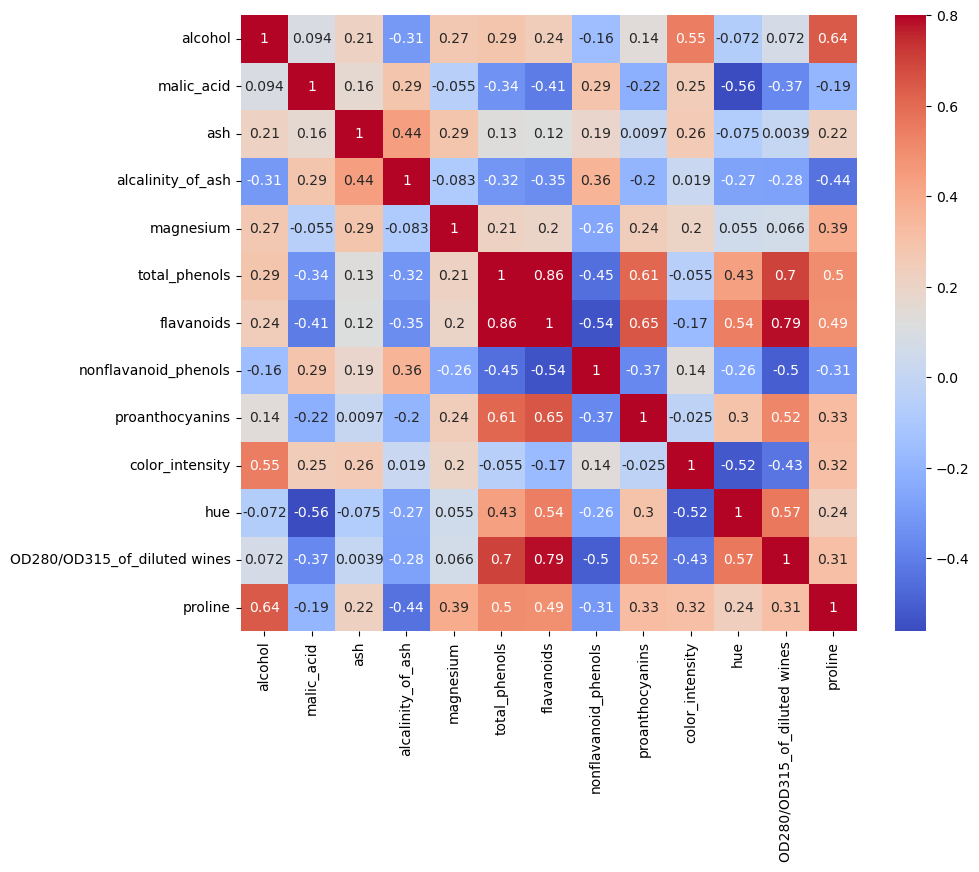

In [62]:
#Relació entre variables numèriques 
variables_numeriques = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted wines', 'proline'] 

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(wines[variables_numeriques].corr(), vmax=.8, square=True, annot=True, cmap='coolwarm');
plt.show()

Les variables amb una correlació més forta són total_phenols i flavanoids, de 0,86. La primera fa referència a la quantitat total de fenols i la segona a la quantitat d'un tipus específic de fenols. Per tant, un augment de la quantitat de flavanoids està associat a un augment del nombre de fenols.

En canvi, passa el contrari si ens fixem en la relació entre les variables total_phenols i nonflavanoid_phenols, ja que la correlació és negativa, de 0,45. És a dir, un augment de la variable total_phenols està associat a una disminució de la variable nonflavanoid_phenols.

La segona correlació més forta entre variables ñes la que existeix entre la variable flavanoids i OD280/OD315_of_diluted wines. La segona es refereix a una relació òptica que pot estar relacionada amb la intensitat del color del vi. Per tant, l'augment de flavanoids està associada a un augment de la intensitat del color del vi.

La distribució de la variable target és força equitativa. No hi ha el mateix nombre de mostres per a cada classe però s'aproxima bastant.

### Preparació de les dades

#### Preprocessats

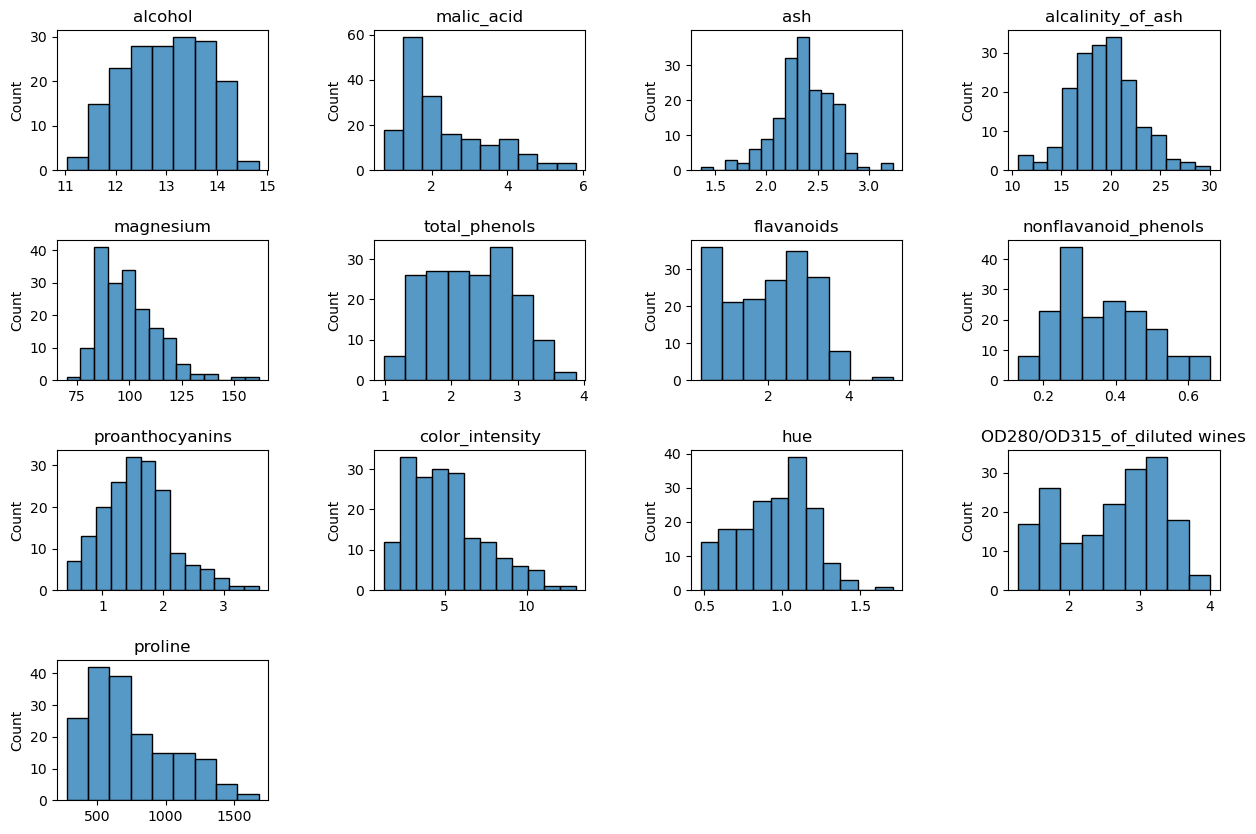

In [60]:
# Determinem si les variables tenen o no distribució normal

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

axes = axes.flatten()

for i, variable in enumerate(variables_numeriques):
    sns.histplot(x=wines[variable], ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set(xlabel='')

for j in range(i+1, 4 * 4): #para eliminar l'últim gràfic
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Cap de les variables té una distribució normal, totes estan més o menys esbiaixades cap a la dreta o cap a l'esquerre.

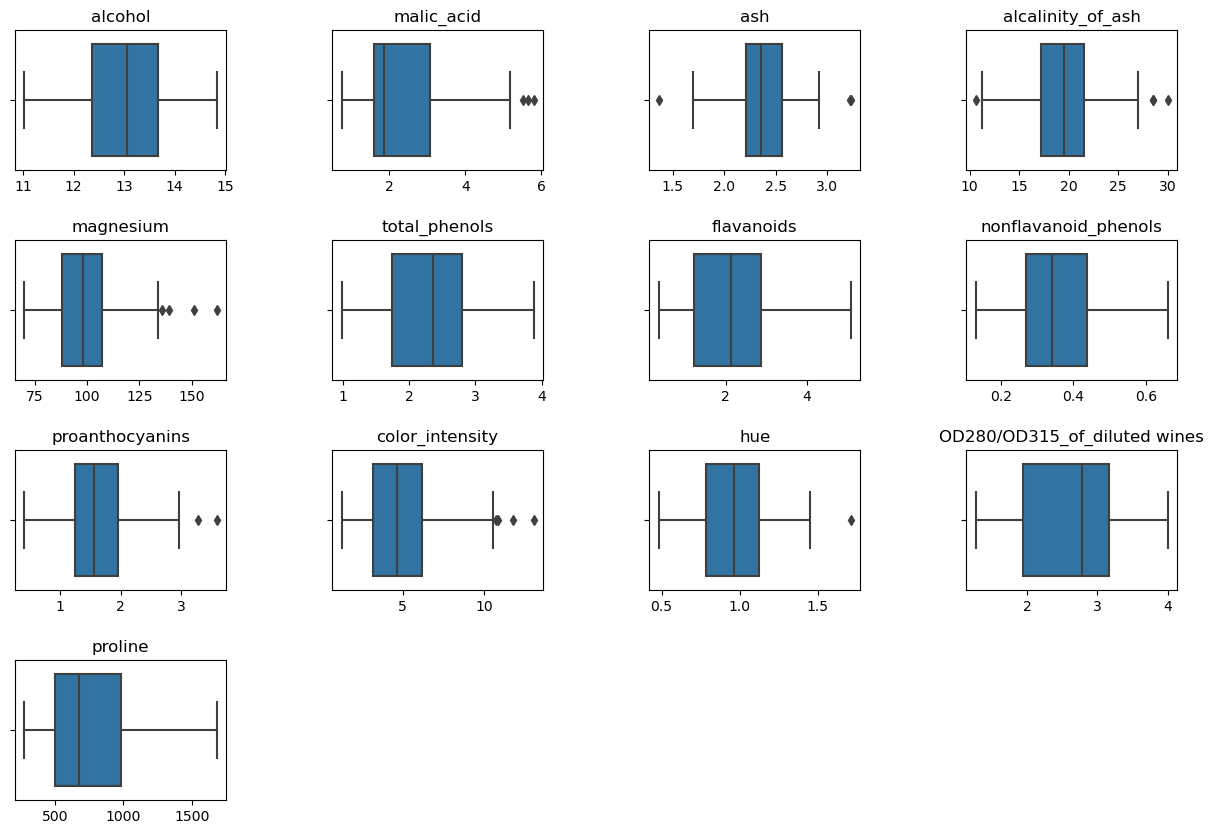

In [61]:
# Identifiquem si tenen o no outliers

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

axes = axes.flatten()

for i, variable in enumerate(variables_numeriques):
    sns.boxplot(x=wines[variable], ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set(xlabel='')

for j in range(i+1, 4 * 4): #para eliminar l'últim gràfic
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Veient que cap de les variables té una distribució normal ens centrem en els outliers. Les variables malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyains, color_intensity i hue tenen outliers. La resta, alcohol, total_phenols, flavanoids, nonflavanoids_phenols, OD280/0D315_of_diluted_wines i proline, no en tenen. Per tant, en les primeres aplicarem el Robuscaler() i a la resta el MinMaxScaler().

#### Transformacions

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

variables_numeriques_ouliers = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy='median')),
        ('robust', RobustScaler())
    ]
)

variables_numeriques_minmax = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'OD280/OD315_of_diluted wines', 'proline']
numeric_transformer_minmax = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy='median')),
        ('minmax', MinMaxScaler())
    ]
)

In [89]:
#Apliquem les transformacions al dataset

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

numeric_features_outliers = variables_numeriques_ouliers
numeric_features_minmax = variables_numeriques_minmax

preprocessor = ColumnTransformer(
    transformers=[
        ('num_outliers', numeric_transformer, variables_numeriques_ouliers),
        ('num_minmax', numeric_transformer_minmax, variables_numeriques_minmax)
    ],
    remainder='drop'  
)

wines_transformed = preprocessor.fit_transform(wines)
wines_transformed = pd.DataFrame(wines_transformed, columns=variables_numeriques)

In [90]:
wines_prepared = pd.concat([wines_transformed, wines['class']], axis=1)
wines_prepared

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline,class
0,-0.104730,0.201439,-0.906977,1.526316,1.050000,0.318792,0.222222,0.842105,0.627586,0.573840,0.283019,0.970696,0.561341,1
1,-0.057432,-0.633094,-1.930233,0.105263,-0.392857,-0.104027,0.251852,0.571053,0.575862,0.510549,0.245283,0.780220,0.550642,1
2,0.334459,0.892086,-0.209302,0.157895,1.792857,0.332215,0.192593,0.560526,0.627586,0.611814,0.320755,0.695971,0.646933,1
3,0.057432,0.402878,-0.627907,0.789474,0.892857,1.043624,-0.311111,0.878947,0.989655,0.664557,0.207547,0.798535,0.857347,1
4,0.489865,1.467626,0.348837,1.052632,0.378571,-0.124161,0.222222,0.581579,0.627586,0.495781,0.490566,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.557432,0.258993,0.232558,-0.157895,-0.707143,1.010067,-0.962963,0.705263,0.241379,0.056962,0.735849,0.172161,0.329529,3
174,1.381757,0.345324,0.813953,0.210526,-0.207143,0.875839,-0.785185,0.623684,0.282759,0.086498,0.566038,0.106227,0.336662,3
175,1.631757,-0.287770,0.116279,1.157895,-0.292857,1.848993,-1.111111,0.589474,0.210345,0.073840,0.566038,0.106227,0.397290,3
176,0.489865,0.028777,0.116279,1.157895,-0.135714,1.546980,-1.081481,0.563158,0.231034,0.071730,0.754717,0.128205,0.400856,3


### Models

#### Exercici 1: Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [91]:
# Variables X i y
X = wines_prepared.drop('class', axis=1)
y = wines_prepared['class']

In [92]:
#Train i Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Forma del Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Forma del Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Forma del Training set: X=(142, 13), y=(142,)
Forma del Test set: X=(36, 13), y=(36,)


In [106]:
y.value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

La distribució de les mostres no és del tot equitativa, tenim més registres de la classe 2 que de les altres dues.

In [108]:
# Balancegem la variable target

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, y = ros.fit_resample(X,y)

In [109]:
y.value_counts()

1    71
2    71
3    71
Name: class, dtype: int64

#### (1) K-nearest neightbors (kNN)

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

#### (2) Support Vector Machines (SVM)

In [171]:
from sklearn.svm import SVC

svm_model = SVC() 
svm_model.fit(X_train, y_train)

SVC()

#### Exercici 2: Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.


Accuracy: 0.8611111111111112 

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.79      0.85        14
           3       0.80      1.00      0.89         8

    accuracy                           0.86        36
   macro avg       0.86      0.88      0.86        36
weighted avg       0.87      0.86      0.86        36


Matriu de Confusió:
 Axes(0.125,0.11;0.62x0.77)


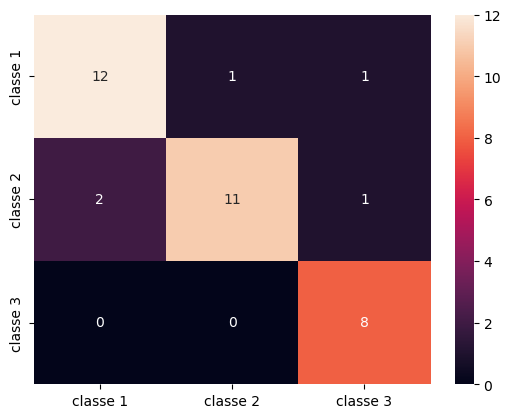

In [172]:
# KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = knn_model.predict(X_test)

#Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')

#Altres mètriques
print('Classification Report:\n', classification_report(y_test, y_pred))

#Matriu de confusió
classes_vins = ['classe 1','classe 2','classe 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_vins, index = classes_vins)
print('\nMatriu de Confusió:\n', sns.heatmap(cm, annot=True, fmt='d'))

El model té una precisió de 0.86, és a dir, a nivell general ha classificat correctament el vi el 86% de les vegades.

Si ens fixem en el classification_report, veiem que la classe 2 és la que el model predeix amb major precisió (un 92%) i la classe 3 la que menys (amb un 80%). No obstant, la classe 3 és la que té un recall més alt, és a dir, de totes les mostres de cada classe que hi ha en el conjunt de prova, la classe 3 és la que el model ha identificat més (el 100% de les vegades). Això es veu reflexat en el f1-score, una mètrica que combina les dues anteriors i que otorga una major puntuació a la classe 3.

Tenint en compte l'anterior, en la matriu de confusió hem de fixar-nos en els nombres fora de la diagonal, ja que són aquells en els que el model ha fallat. En el cas de la classe 3, no hi ha cap mostra que el model hagi confós per un vi de la classe 1 o 2. En canvi, en el cas de les altres classes: 
- el model ha confós la classe 1 per la classe 2 en una ocasió, i per la classe 3 en una ocasió també; i
- ha confós dos vins de la classe 2 per la classe 1 i un per la classe 3. 

Accuracy: 0.9444444444444444 

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36


Matriu de Confusió:
 Axes(0.125,0.11;0.62x0.77)


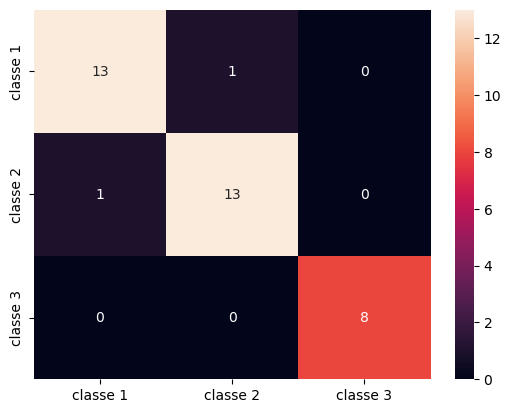

In [173]:
# SVM

y_pred = svm_model.predict(X_test)

#Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred), '\n')

#Altres mètriques
print('Classification Report:\n', classification_report(y_test, y_pred))

#Matriu de confusió
classes_vins = ['classe 1','classe 2','classe 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_vins, index = classes_vins)
print('\nMatriu de Confusió:\n', sns.heatmap(cm, annot=True, fmt='d'))

El model SVM té una major precisió que el KNN, d'un 94,4%. També veiem que la classé 3 és la que té un major f1-score, i en aquest cas també una major precisió i recall. 

Així mateix, en la matriu de confusió veiem que el model no ha confós cap mostra de la classe 3 per una de les altres classes, i que únicament ha mostrat confusió entre mostres de la classe 1 i 2. 

#### Exercici 3: Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [174]:
from sklearn.model_selection import GridSearchCV

# Definició de la cuadrícula de paràmetres pel KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],        
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Definició de la cuadrícula de paràmetres pel SVM
param_grid_svm = {
    'C': [0.1, 1, 10],          
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

knn_model = KNeighborsClassifier()
svm_model = SVC()

# Ús del GridSearchCV per trobar els millors paràmetres pel DecisionTreeRegressor
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Ús del GridSearchCV per trobar els millors paràmetres pel RandomForestRegressor
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("Millors paràmetres pel KNN:", grid_search_knn.best_params_)
print("Millors paràmetres pel SVM:", grid_search_svm.best_params_)

Millors paràmetres pel KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Millors paràmetres pel SVM: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


In [180]:
# Prediccions amb els nous models
predictions_best_knn = grid_search_knn.predict(X_test)
predictions_best_svm = grid_search_svm.predict(X_test)

# Evaluació dels models
print('Accuracy KNN:', accuracy_score(y_test, predictions_best_knn))
print('Accuracy SVM:', accuracy_score(y_test, predictions_best_svm))

Accuracy KNN: 0.9166666666666666
Accuracy SVM: 0.9722222222222222


Veiem que en ambdós casos la precisió del model ha millorat, en el cas del KNN del 86% al 91,7%, i en el cas del SVM del 94,4% al 97,2%.

#### Exercici 4: Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [178]:
from sklearn.model_selection import cross_val_score

# KNN
knn_cv = KNeighborsClassifier() #nou model
knn_cv_scores = cross_val_score(knn_cv, X, y, cv=5, scoring='accuracy')
print('Accuracy KNN amb cross-validation:', knn_cv_scores.mean())

#SVM
svm_cv = SVC()
svm_cv_scores = cross_val_score(svm_cv, X, y, cv=5, scoring='accuracy')
print('Accuracy SVM amb cross-validation:', svm_cv_scores.mean())

Accuracy KNN amb cross-validation: 0.9110741971207087
Accuracy SVM amb cross-validation: 0.9626799557032115


Si comparem els resultats amb l'exercici anterior, veiem que en ambdós casos la precisió del model ha disminuït, tot i que seguenix sent molt bona, en el cas del KNN del 91,1% i en el cas del SVM del 96,3%.

#### Exercici 5: Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Prèviament a construir els models en l'Exercici 1, ja s'han aplicat processos d'enginyeria per a millorar els resultats del model. En concret:
- el RobustScaler(): per escalar els valors amb outliers, 
- el MinMaxScaler(): per escalar els valors sense outliers, i
- el RandomOverSampler() - per balancejar les mostres de les diferents classes de vi.